# Binary Classifier

## Import Libraries

In [52]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading and Preprocessing

### World Bank Projects data set <a href="https://datacatalog.worldbank.org/search/dataset/0037800/World-Bank-Projects---Operations">Link</a>

In [2]:
df = pd.read_excel("World_Bank_Projects_downloaded_6_16_2022.xls")
# df.columns = df.iloc[0]
df = df.drop(df.index[0])
df

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,Invigorating local market & competition in Pub...,Malawi - Public Procurement and Disposal of As...,NaN,http://projects.worldbank.org/P175792/null?lan...,2022-03-25T00:00:00Z,...,410000,Republic of Malawi,Investment Project Financing,C,NaN,NaN,NaN,NaN,NaN,NaN
5,P177073,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,To improve the climate resilience of the Recip...,"Department of Transportation, Communications &...",NaN,http://projects.worldbank.org/P177073/null?lan...,2022-03-25T00:00:00Z,...,0,Federated States of Micronesia,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483,P006578,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,NaN,NaN,NaN,http://projects.worldbank.org/P006578/null?lan...,1948-03-25T00:00:00Z,...,0,NaN,Specific Investment Loan,NaN,NaN,(Historic)Hydro,NaN,NaN,NaN,NaN
21484,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,NaN,NaN,NaN,http://projects.worldbank.org/P037451/null?lan...,1947-08-28T00:00:00Z,...,0,NaN,Structural Adjustment Loan,NaN,NaN,(Historic)Economic management,NaN,NaN,NaN,NaN
21485,P037362,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,NaN,NaN,NaN,http://projects.worldbank.org/P037362/null?lan...,1947-08-22T00:00:00Z,...,0,NaN,Structural Adjustment Loan,NaN,NaN,(Historic)Economic management,NaN,NaN,NaN,NaN
21486,P037452,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,NaN,NaN,NaN,http://projects.worldbank.org/P037452/null?lan...,1947-08-07T00:00:00Z,...,0,NaN,Structural Adjustment Loan,NaN,NaN,(Historic)Economic management,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21487 entries, 1 to 21487
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Project ID                         21487 non-null  object
 1   Region                             21485 non-null  object
 2   Country                            21485 non-null  object
 3   Project Status                     21484 non-null  object
 4   Project Name                       21487 non-null  object
 5   Project Development Objective      11525 non-null  object
 6   Implementing Agency                6549 non-null   object
 7   Consultant Services Required       28 non-null     object
 8   Project URL                        21487 non-null  object
 9   Board Approval Date                18617 non-null  object
 10  Project Closing Date               16458 non-null  object
 11  Financing Type                     12876 non-null  object
 12  Curr

In [4]:
df.isnull()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,True,True,True,True,True
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483,False,False,False,False,False,True,True,True,False,False,...,False,True,False,True,True,False,True,True,True,True
21484,False,False,False,False,False,True,True,True,False,False,...,False,True,False,True,True,False,True,True,True,True
21485,False,False,False,False,False,True,True,True,False,False,...,False,True,False,True,True,False,True,True,True,True
21486,False,False,False,False,False,True,True,True,False,False,...,False,True,False,True,True,False,True,True,True,True


In [5]:
df.describe()

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
count,21487,21485,21485,21484,21487,11525,6549,28,21487,18617,...,21487,6317,21239,13083,27,19493,11056,7496,12255,9895
unique,21487,9,206,4,18549,9810,4564,3,21487,5939,...,967,2172,18,8,4,159,102,90,73,73
top,P169983,Latin America and Caribbean,Republic of India,Closed,Education Project (02),Project Development Objective (Note: will be d...,Ministry of Finance,Y,http://projects.worldbank.org/P169983/null?lan...,2020-04-02T00:00:00Z,...,0,Ministry of Finance,Specific Investment Loan,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
freq,1,3758,915,15718,70,47,220,19,1,28,...,17589,675,8021,5863,16,1810,1628,758,919,715


In [6]:
df.dtypes

Project ID                           object
Region                               object
Country                              object
Project Status                       object
Project Name                         object
Project Development Objective        object
Implementing Agency                  object
Consultant Services Required         object
Project URL                          object
Board Approval Date                  object
Project Closing Date                 object
Financing Type                       object
Current Project Cost                 object
IBRD Commitment                      object
IDA Commitment                       object
Total IDA and IBRD Commitment        object
Grant Amount                         object
Borrower                             object
Lending Instrument                   object
Environmental Assessment Category    object
Environmental and Social Risk        object
Sector 1                             object
Sector 2                        

In [7]:
df.columns

Index(['Project ID', 'Region', 'Country', 'Project Status', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],
      dtype='object')

In [8]:
df = df.drop(['Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],axis=1)
df

,Project ID,Region,Country,Project Status,Project Name,Project URL,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
1,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,http://projects.worldbank.org/P169983/null?lan...,500000000,0,500000000,0
2,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,http://projects.worldbank.org/P173711/null?lan...,0,400000000,400000000,0
3,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,http://projects.worldbank.org/P175747/null?lan...,180000000,0,180000000,0
4,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,http://projects.worldbank.org/P175792/null?lan...,0,0,0,410000
5,P177073,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,http://projects.worldbank.org/P177073/null?lan...,0,35250000,35250000,0
...,...,...,...,...,...,...,...,...,...,...
21483,P006578,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,http://projects.worldbank.org/P006578/null?lan...,13500000,0,13500000,0
21484,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,http://projects.worldbank.org/P037451/null?lan...,12000000,0,12000000,0
21485,P037362,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,http://projects.worldbank.org/P037362/null?lan...,40000000,0,40000000,0
21486,P037452,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,http://projects.worldbank.org/P037452/null?lan...,195000000,0,195000000,0


In [9]:
df = df.dropna(axis = 0)
df

,Project ID,Region,Country,Project Status,Project Name,Project URL,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
1,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,http://projects.worldbank.org/P169983/null?lan...,500000000,0,500000000,0
2,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,http://projects.worldbank.org/P173711/null?lan...,0,400000000,400000000,0
3,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,http://projects.worldbank.org/P175747/null?lan...,180000000,0,180000000,0
4,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,http://projects.worldbank.org/P175792/null?lan...,0,0,0,410000
5,P177073,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,http://projects.worldbank.org/P177073/null?lan...,0,35250000,35250000,0
...,...,...,...,...,...,...,...,...,...,...
21483,P006578,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,http://projects.worldbank.org/P006578/null?lan...,13500000,0,13500000,0
21484,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,http://projects.worldbank.org/P037451/null?lan...,12000000,0,12000000,0
21485,P037362,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,http://projects.worldbank.org/P037362/null?lan...,40000000,0,40000000,0
21486,P037452,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,http://projects.worldbank.org/P037452/null?lan...,195000000,0,195000000,0


In [10]:
df = df.drop(["Project URL", 'Project ID'],axis=1)
df

,Region,Country,Project Status,Project Name,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
1,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,500000000,0,500000000,0
2,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,0,400000000,400000000,0
3,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,180000000,0,180000000,0
4,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,0,0,0,410000
5,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,0,35250000,35250000,0
...,...,...,...,...,...,...,...,...
21483,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,13500000,0,13500000,0
21484,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,12000000,0,12000000,0
21485,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,40000000,0,40000000,0
21486,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,195000000,0,195000000,0


In [11]:
df.describe(include='all').loc['unique', :]

Region                               9
Country                            206
Project Status                       4
Project Name                     18544
IBRD Commitment                   1297
IDA Commitment                    1228
Total IDA and IBRD Commitment     1903
Grant Amount                       966
Name: unique, dtype: object

In [12]:
df = df[df['Project Status'] != 'Active']
df = df[df['Project Status'] != 'Pipeline'] 
df

,Region,Country,Project Status,Project Name,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
67,Africa East,Republic of Uganda,Closed,"Enhanced Productivity, Accountability & Knowle...",0,0,0,440000
378,East Asia and Pacific,Republic of Indonesia,Closed,Indonesia Investment and Trade Reforms DPL,800000000,0,800000000,0
449,Africa West,Republic of Togo,Closed,Additional Financing for West Africa Regional ...,0,11000000,11000000,0
492,Africa West,Republic of Cameroon,Closed,Third Fiscal Consolidation and Inclusive Growt...,0,100000000,100000000,0
544,Latin America and Caribbean,Commonwealth of Dominica,Closed,Dominica First COVID-19 Response and Recovery ...,0,25000000,25000000,0
...,...,...,...,...,...,...,...,...
21483,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,13500000,0,13500000,0
21484,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,12000000,0,12000000,0
21485,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,40000000,0,40000000,0
21486,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,195000000,0,195000000,0


In [13]:
df.reset_index(inplace = True, drop = True)
df

,Region,Country,Project Status,Project Name,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
0,Africa East,Republic of Uganda,Closed,"Enhanced Productivity, Accountability & Knowle...",0,0,0,440000
1,East Asia and Pacific,Republic of Indonesia,Closed,Indonesia Investment and Trade Reforms DPL,800000000,0,800000000,0
2,Africa West,Republic of Togo,Closed,Additional Financing for West Africa Regional ...,0,11000000,11000000,0
3,Africa West,Republic of Cameroon,Closed,Third Fiscal Consolidation and Inclusive Growt...,0,100000000,100000000,0
4,Latin America and Caribbean,Commonwealth of Dominica,Closed,Dominica First COVID-19 Response and Recovery ...,0,25000000,25000000,0
...,...,...,...,...,...,...,...,...
17420,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,13500000,0,13500000,0
17421,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,12000000,0,12000000,0
17422,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,40000000,0,40000000,0
17423,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,195000000,0,195000000,0


In [14]:
label_encoder = LabelEncoder()

df['Region'] = label_encoder.fit_transform(df['Region'])
df['Region']

0        1
1        3
2        2
3        2
4        5
        ..
17420    5
17421    4
17422    4
17423    4
17424    4
Name: Region, Length: 17425, dtype: int32

In [15]:
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Country'].unique()

array([164, 122, 160,  98,  20,  88,  35,  45, 104, 156, 200, 188,  23,
        40,  93,  11,  87,  82, 199, 144, 126, 108, 182, 171, 139,  24,
       155,  76,  15, 201, 132,  73, 128,  97, 142, 172,  47, 116,  64,
       203, 125, 121,  48, 118, 103, 198, 115, 105, 101,  27,  79, 151,
       184,  58, 152, 162,  38, 159,  84,  62, 202, 183, 148,  53,  12,
       146,  32,  50, 130,  74,  99, 178, 149,  26, 135, 163,  89,  61,
       112,  68, 145,   6, 134,   4, 165, 189,  41,  65, 177, 107, 133,
        37, 205,  92, 114, 195,  30, 197,  33, 119, 138,  25,  67, 175,
        83,  18,  14, 150, 123,   0,  66, 158, 168, 157, 186, 167,  78,
        10, 102, 137, 100, 173, 141,  96,  57,  91,  56, 196,  31, 185,
       169, 140,  54, 124, 204,  29,  95, 147, 166, 170, 117,   9,  17,
        34,  80,  75, 109,  13, 176,  72,   3,  16,  21, 161, 181,  22,
       129,  70,   1, 193,   7,   2,  94,  43, 110,  81,   8,  69, 190,
       143,  71, 179, 174,  46, 131, 187, 127, 154, 111,  86,   

In [16]:
df['Project Status'] = label_encoder.fit_transform(df['Project Status'])
df

,Region,Country,Project Status,Project Name,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
0,1,164,0,"Enhanced Productivity, Accountability & Knowle...",0,0,0,440000
1,3,122,0,Indonesia Investment and Trade Reforms DPL,800000000,0,800000000,0
2,2,160,0,Additional Financing for West Africa Regional ...,0,11000000,11000000,0
3,2,98,0,Third Fiscal Consolidation and Inclusive Growt...,0,100000000,100000000,0
4,5,20,0,Dominica First COVID-19 Response and Recovery ...,0,25000000,25000000,0
...,...,...,...,...,...,...,...,...
17420,5,100,0,Power and Irrigation Project,13500000,0,13500000,0
17421,4,39,0,Steel Mill and Railway Project,12000000,0,12000000,0
17422,4,55,0,Post War Reconstruction Project,40000000,0,40000000,0
17423,4,63,0,Post-war Reconstruction Project,195000000,0,195000000,0


In [17]:
df['Project Status'].value_counts()

0    15718
1     1707
Name: Project Status, dtype: int64

In [18]:
df.dtypes

Region                            int32
Country                           int32
Project Status                    int32
Project Name                     object
IBRD Commitment                  object
IDA Commitment                   object
Total IDA and IBRD Commitment    object
Grant Amount                     object
dtype: object

In [19]:
cols_to_exclude = ['Region','Country','Project Status','Project Name']
for col in df.columns:
    if df[col].nunique() > 600 and col not in cols_to_exclude:
        df[col] = df[col].astype('int64') 

In [20]:
df.dtypes

Region                            int32
Country                           int32
Project Status                    int32
Project Name                     object
IBRD Commitment                   int64
IDA Commitment                    int64
Total IDA and IBRD Commitment     int64
Grant Amount                      int64
dtype: object

In [21]:
cols_to_exclude = ['Project Name']
for col in df.columns:
    if df[col].nunique() > 0 and col in cols_to_exclude:
        df[col] = df[col].astype(str)

In [22]:
df.reset_index(inplace = True, drop = True)
df

,Region,Country,Project Status,Project Name,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
0,1,164,0,"Enhanced Productivity, Accountability & Knowle...",0,0,0,440000
1,3,122,0,Indonesia Investment and Trade Reforms DPL,800000000,0,800000000,0
2,2,160,0,Additional Financing for West Africa Regional ...,0,11000000,11000000,0
3,2,98,0,Third Fiscal Consolidation and Inclusive Growt...,0,100000000,100000000,0
4,5,20,0,Dominica First COVID-19 Response and Recovery ...,0,25000000,25000000,0
...,...,...,...,...,...,...,...,...
17420,5,100,0,Power and Irrigation Project,13500000,0,13500000,0
17421,4,39,0,Steel Mill and Railway Project,12000000,0,12000000,0
17422,4,55,0,Post War Reconstruction Project,40000000,0,40000000,0
17423,4,63,0,Post-war Reconstruction Project,195000000,0,195000000,0


### Feature importance using XGBoost

In [23]:
def feature_imp(df):
    data = df.copy()
    y = df['Project Status']
    X = df.drop(['Project Status', 'Project Name'], axis=1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=5)

    return (X_train, Y_train), (X_test, Y_test)

In [24]:
(X_train, Y_train), (X_test, Y_test) = feature_imp(df)

In [25]:
xgb_reg = xgb.XGBRegressor(gamma=0.0, n_estimators = 160, base_score = 0.7, colsample_bytree=1, learning_rate = 0.05)
xgb_reg

XGBRegressor(base_score=0.7, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=1,
             enable_categorical=False, gamma=0.0, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=160, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [26]:
xgb_model = xgb_reg.fit(X_train, Y_train, eval_metric="rmse", eval_set = [(X_train, Y_train),(X_test, Y_test)])

[0]	validation_0-rmse:0.64437	validation_1-rmse:0.64435
[1]	validation_0-rmse:0.61886	validation_1-rmse:0.61900
[2]	validation_0-rmse:0.59491	validation_1-rmse:0.59523
[3]	validation_0-rmse:0.57243	validation_1-rmse:0.57292
[4]	validation_0-rmse:0.55133	validation_1-rmse:0.55199
[5]	validation_0-rmse:0.53154	validation_1-rmse:0.53243
[6]	validation_0-rmse:0.51302	validation_1-rmse:0.51404
[7]	validation_0-rmse:0.49569	validation_1-rmse:0.49696
[8]	validation_0-rmse:0.47940	validation_1-rmse:0.48083
[9]	validation_0-rmse:0.46427	validation_1-rmse:0.46597
[10]	validation_0-rmse:0.45014	validation_1-rmse:0.45203
[11]	validation_0-rmse:0.43700	validation_1-rmse:0.43905
[12]	validation_0-rmse:0.42478	validation_1-rmse:0.42701
[13]	validation_0-rmse:0.41336	validation_1-rmse:0.41578
[14]	validation_0-rmse:0.40282	validation_1-rmse:0.40538
[15]	validation_0-rmse:0.39298	validation_1-rmse:0.39572
[16]	validation_0-rmse:0.38392	validation_1-rmse:0.38692
[17]	validation_0-rmse:0.37540	validation

[144]	validation_0-rmse:0.26956	validation_1-rmse:0.28856
[145]	validation_0-rmse:0.26944	validation_1-rmse:0.28859
[146]	validation_0-rmse:0.26932	validation_1-rmse:0.28854
[147]	validation_0-rmse:0.26920	validation_1-rmse:0.28855
[148]	validation_0-rmse:0.26913	validation_1-rmse:0.28858
[149]	validation_0-rmse:0.26913	validation_1-rmse:0.28858
[150]	validation_0-rmse:0.26904	validation_1-rmse:0.28861
[151]	validation_0-rmse:0.26894	validation_1-rmse:0.28862
[152]	validation_0-rmse:0.26885	validation_1-rmse:0.28862
[153]	validation_0-rmse:0.26878	validation_1-rmse:0.28861
[154]	validation_0-rmse:0.26876	validation_1-rmse:0.28863
[155]	validation_0-rmse:0.26873	validation_1-rmse:0.28863
[156]	validation_0-rmse:0.26866	validation_1-rmse:0.28864
[157]	validation_0-rmse:0.26862	validation_1-rmse:0.28864
[158]	validation_0-rmse:0.26852	validation_1-rmse:0.28861
[159]	validation_0-rmse:0.26849	validation_1-rmse:0.28858


In [27]:
xgb_result = xgb_reg.evals_result()

In [28]:
training_rounds = range(0,len(xgb_result['validation_0']['rmse']))

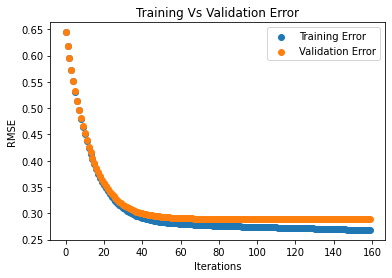

In [29]:
plt.scatter(x=training_rounds,y=xgb_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=xgb_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

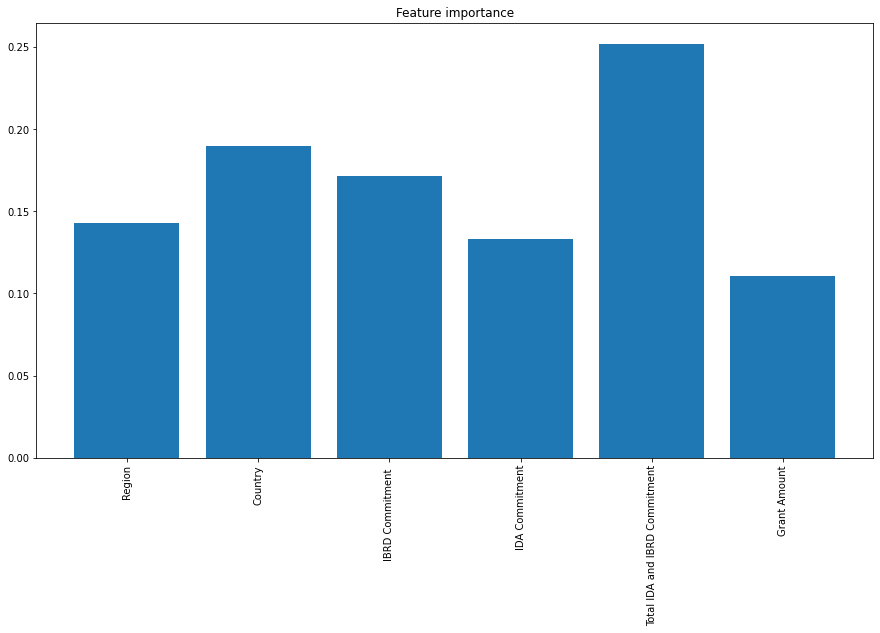

In [30]:
fig = plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgb_model.feature_importances_))], xgb_model.feature_importances_.tolist(), tick_label=X_test.columns)
plt.title('Feature importance')
plt.show()

## Model

### XGBoost DMatrix

In [31]:
dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_test, Y_test)

In [32]:
param = {'max_depth':2, 'eta':0.2, 'objective': 'multi:softmax', 'num_class':2,'eval_metric':'mlogloss'}
epochs=10
dmodel = xgb.train(param, dtrain, epochs)

In [33]:
predictions = dmodel.predict(dtest)

In [91]:
print('prediction: ',predictions)

prediction:  [0. 0. 0. ... 0. 0. 0.]


In [92]:
print( 'accuracy: ',accuracy_score(Y_test, predictions))

accuracy:  0.9015377553362406


### MLP (Multi Layer Perceptron) Classifier

In [93]:
model = MLPClassifier(solver = 'adam', alpha=1e-5, hidden_layer_sizes=(6, 2), random_state=1, max_iter=100)
model.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 2), max_iter=100,
              random_state=1)

In [94]:
print('prediction: ', model.predict(X_test))

prediction:  [0 0 0 ... 0 0 0]


In [95]:
print( 'accuracy: ',model.score(X_test, Y_test))

accuracy:  0.9015377553362406
